In [1]:
import essentia.standard as es
import essentia
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def melspectrogram(audio):
    windowing = es.Windowing(type='hann', normalized=False, zeroPadding=0)
    spectrum = es.Spectrum()
    melbands = es.MelBands(numberBands=48,
                                   sampleRate=16000,
                                   lowFrequencyBound=0,
                                   highFrequencyBound=16000/2,
                                   inputSize=(512+0)//2+1,
                                   weighting='linear',
                                   normalize='unit_tri',
                                   warpingFormula='slaneyMel',
                                   type='power')
    amp2db = es.UnaryOperator(type='lin2db', scale=2)

    results = essentia.Pool()

    for frame in es.FrameGenerator(audio, frameSize=512, hopSize=256,
                                   startFromZero=False):
        spectrumFrame = spectrum(windowing(frame))

        melFrame = melbands(spectrumFrame)
        results.add('mel_' + str(48)+'_db', amp2db(melFrame))
    return results['mel_48_db'].T


audio = es.MonoLoader(filename='576977.mp3', sampleRate=16000)()
mels = melspectrogram(audio)

In [4]:
mels.mean()

-24.523563

In [5]:
mel_melon = np.load('576977.npy')
mels = mels[:, 1250:-4]
rmse = np.sqrt(((mels - mel_melon)**2).mean())
rmse

0.8336517

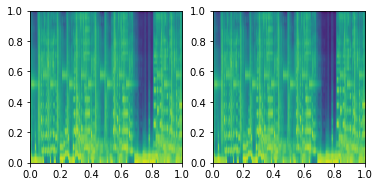

In [6]:
plt.subplot(1,2,1)
plt.imshow(np.flipud(mels), extent=[0, 1, 0, 1])
plt.subplot(1,2,2)
plt.imshow(np.flipud(mel_melon), extent=[0, 1, 0, 1])

In [7]:
20*np.log10(np.mean(np.abs(mels-mel_melon))/np.max(np.abs(mels))) #dB

-42.881431579589844

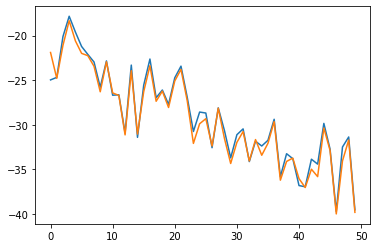

In [8]:
plt.plot(mel_melon[33,0:50])
plt.plot(mels[33,0:50])